# Exploracion GENERAL.

In [2]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# My Tools
%matplotlib inline

In [3]:
# Reseting figure size params.
plt.rcParams['figure.figsize'] = [12, 7]

In [4]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_theme(palette='pastel')

In [5]:
# Reading data.
df = pd.read_csv('encuesta_baches_fixed.csv')

In [6]:
# helper columns
def show_columns():
    for i in df.columns:print(i)

## Descripcion GENERAL de dataset.

In [7]:
df.shape

(439, 17)

    El dataset contiene 439 filas y 17 columnas de datos. Lo que puede traducirse en 439 respuestas a la encuesta.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                439 non-null    int64 
 1   marca_temporal            439 non-null    object
 2   lugar_residencia          439 non-null    object
 3   lugar_residencia_py       247 non-null    object
 4   estado_calles             436 non-null    object
 5   problema_baches           437 non-null    object
 6   estimacion_cantidad       435 non-null    object
 7   tipo_camino               438 non-null    object
 8   tiempo_reparaciones       437 non-null    object
 9   como_denunciar            436 non-null    object
 10  acceso_informacion        438 non-null    object
 11  sufrio_accidentes         438 non-null    object
 12  frecuencia_mantenimiento  386 non-null    object
 13  denunciaria_baches        435 non-null    object
 14  util_conocer              

In [9]:
show_columns()

Unnamed: 0
marca_temporal
lugar_residencia
lugar_residencia_py
estado_calles
problema_baches
estimacion_cantidad
tipo_camino
tiempo_reparaciones
como_denunciar
acceso_informacion
sufrio_accidentes
frecuencia_mantenimiento
denunciaria_baches
util_conocer
respuesta_gubernamental
regularidad_reparaciones


## MOSTRAR CONTEO GENERALIZADO POR COLUMNAS

In [10]:
for i in df.columns:
    print('=='*20)
    print(f'COLUMNA -> {i}')
    print(df[i].value_counts())
    print('=='*20)
    print('\n'*3)

COLUMNA -> Unnamed: 0
0      1
289    1
300    1
299    1
298    1
      ..
143    1
142    1
141    1
140    1
438    1
Name: Unnamed: 0, Length: 439, dtype: int64




COLUMNA -> marca_temporal
29/10/2022 21:02:13    1
8/11/2022 22:41:21     1
8/11/2022 23:27:59     1
8/11/2022 23:25:49     1
8/11/2022 23:21:49     1
                      ..
3/11/2022 12:27:04     1
3/11/2022 12:00:17     1
3/11/2022 11:56:01     1
3/11/2022 11:52:08     1
9/11/2022 20:46:50     1
Name: marca_temporal, Length: 439, dtype: int64




COLUMNA -> lugar_residencia
Paraguay                       236
Mexico                          47
Argentina                       34
Spain                           21
Dominican Republic              19
Peru                            15
Venezuela                       13
Colombia                        12
Bolivia                         12
Chile                            5
Panama                           2
Honduras                         2
Uruguay                       

## lugar_residencia
    - A las personas que respondieron la encuesta se les pidio que indicaran su "lugar de residencia actual" y se les proveyo de una lista de paises con la posibilidad de seleccionar uno.

In [11]:
df['lugar_residencia'].isna().sum()

0

In [12]:
lr = df['lugar_residencia'].value_counts()

In [13]:
# Grafica por conteo del lugar de residencia de los que respondieron la encuesta.
# SOLO LOS LUGARES CON MAS DE 1 RESPUESTA A LA ENCUESTA.
mas_una_respuesta = lr[lr>1]

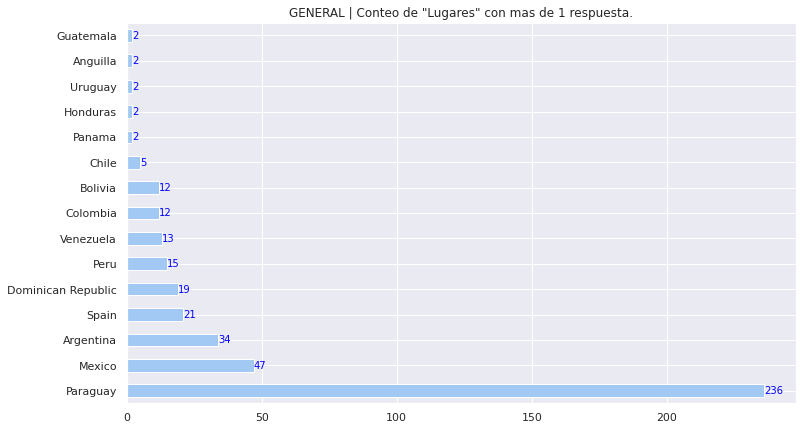

In [14]:
fig1 = mas_una_respuesta.plot(
    kind='barh',
    title=f'GENERAL | Conteo de "Lugares" con mas de 1 respuesta.',
)

for k,v in enumerate(mas_una_respuesta):
    fig1.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

    - Puede verse que los paises con menos respuestas son: Guatemala, Anguilla, Uruguay, Honduras, Panama.

## lugar_residencia_py
    - A los que respondieron la encuesta se les pidio, en el caso posible de seleccionar Paraguay como "lugar de residencia actual", que indicaran el departamento donde residen actualmente. Con el fin de fasilitar la tarea, se les proveyo a los encuestados una lista de departamentos para que puedan seleccionar una opcion.

In [15]:
df['lugar_residencia_py'].isna().sum()

192

In [16]:
lrpy = df['lugar_residencia_py'].value_counts()

In [17]:
lrpy

Central             165
Distrito Capital     33
Alto Paraná          17
Caaguazú              8
Itapúa                7
Cordillera            4
Ñeembucú              3
Amambay               3
Paraguarí             2
Canindeyú             1
Misiones              1
Alto Paraguay         1
Concepción            1
Presidente Hayes      1
Name: lugar_residencia_py, dtype: int64

    Tomamos en cuenta solo los lugares con cantidad de respuestas mayor a 1.

In [18]:
lrpy_mayor_uno = lrpy[lrpy>1]

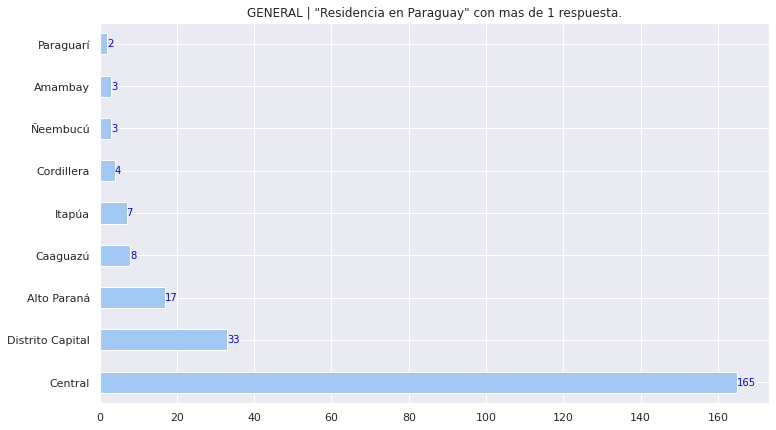

In [19]:
fig2 = lrpy_mayor_uno.plot(
    kind='barh',
    title=f'GENERAL | "Residencia en Paraguay" con mas de 1 respuesta.',
)

for k,v in enumerate(lrpy_mayor_uno):
    fig2.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

## estado_calles
    - A los encuestados se les pregunto sobre "el estado actual de las calles" en su lugar de residencia actual.

In [20]:
# ver cantidad de respuestas validas.
df['estado_calles'].isna().sum()

3

In [21]:
est_calles = df['estado_calles'].value_counts()

In [22]:
est_calles

Malo          187
Lamentable    155
Bueno          82
EXCELENTE      12
Name: estado_calles, dtype: int64

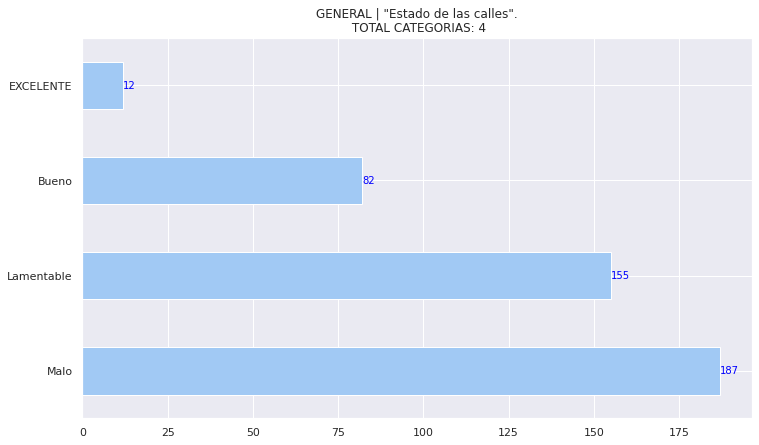

In [23]:
fig3 = est_calles.plot(
    kind='barh',
    title=f'GENERAL | "Estado de las calles".\n TOTAL CATEGORIAS: {est_calles.size}',
)

for k,v in enumerate(est_calles):
    fig3.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

In [24]:
porcent_estado_calles = df['estado_calles'].value_counts(normalize=True)

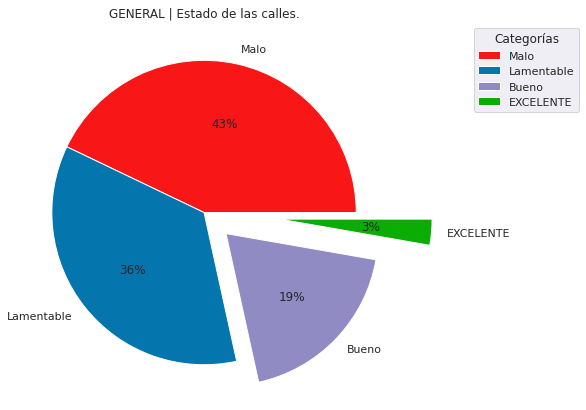

In [25]:
fig4 = df['estado_calles'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Estado de las calles.',
    explode = [0,0,.2,.5],
    colors=['#f81616','#0575ad',"#918BC3",'#0bad05'],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    
    ylabel=''
)

sns.move_legend(
    fig4,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()


## problema_baches
    - A los encuestados se les pregunto si consideran que su "lugar de residencia actual" posee un problema de baches.

In [26]:
prob_baches = df['problema_baches'].value_counts()

In [27]:
prob_baches

SI       375
NO        51
NO SE     11
Name: problema_baches, dtype: int64

In [28]:
df['problema_baches'].isna().sum()

2

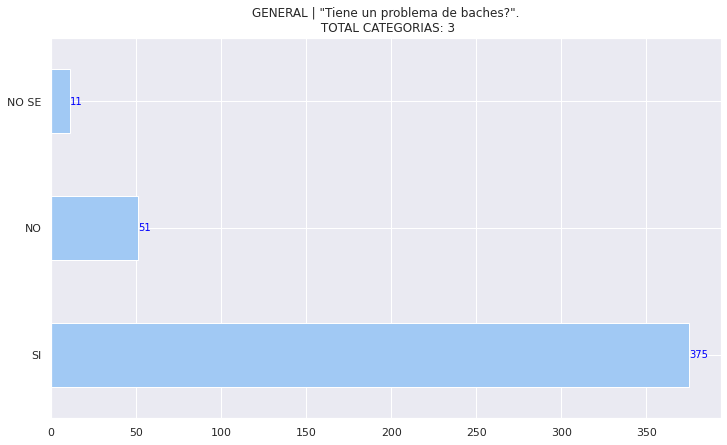

In [29]:
fig5 = prob_baches.plot(
    kind='barh',
    title=f'GENERAL | "Tiene un problema de baches?".\n TOTAL CATEGORIAS: {prob_baches.size}',
    
)

for k,v in enumerate(prob_baches):
    fig5.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

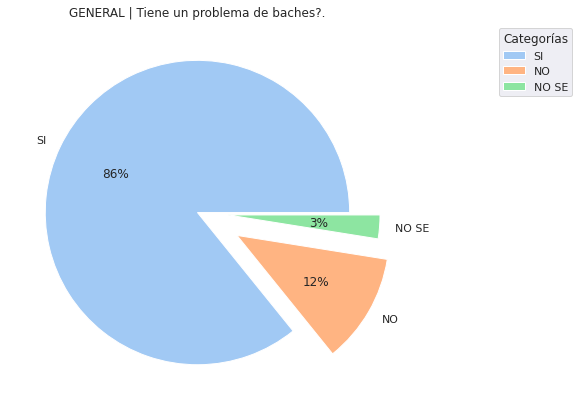

In [30]:
fig6 = df['problema_baches'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Tiene un problema de baches?.',
    explode = [0,.3,.2],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    
    ylabel=''
)

sns.move_legend(
    fig6,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()

## estimacion_cantidad
    - A los encuestados se les pregunto tambien si podrian hacer una estimacion aproximada de la cantidad de baches que existen en su lugar de residencia actual.

In [31]:
est_cant = df['estimacion_cantidad'].value_counts()

In [32]:
est_cant

MUCHOS    325
POCOS      85
NO SE      25
Name: estimacion_cantidad, dtype: int64

In [33]:
df['estimacion_cantidad'].isna().sum()

4

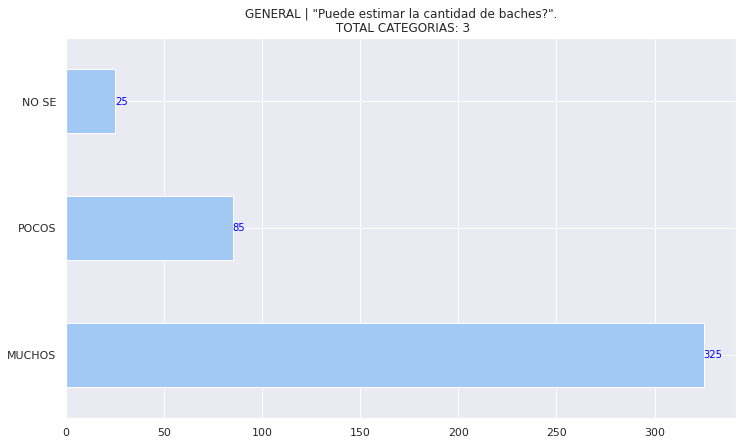

In [34]:
fig7 = est_cant.plot(
    kind='barh',
    title=f'GENERAL | "Puede estimar la cantidad de baches?".\n TOTAL CATEGORIAS: {est_cant.size}',
)

for k,v in enumerate(est_cant):
    fig7.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

## tipo_camino

In [35]:
df['tipo_camino'].isna().sum()

1

In [36]:
tipo_camino=df['tipo_camino'].value_counts()

In [37]:
tipo_camino

ASFALTO    291
MIXTO       77
PIEDRA      57
TIERRA      13
Name: tipo_camino, dtype: int64

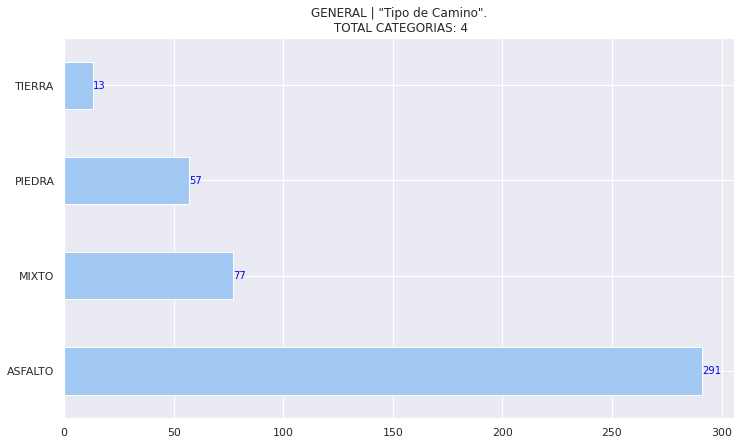

In [38]:
fig8 = tipo_camino.plot(
    kind='barh',
    title=f'GENERAL | "Tipo de Camino".\n TOTAL CATEGORIAS: {tipo_camino.size}',
)

for k,v in enumerate(tipo_camino):
    fig8.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

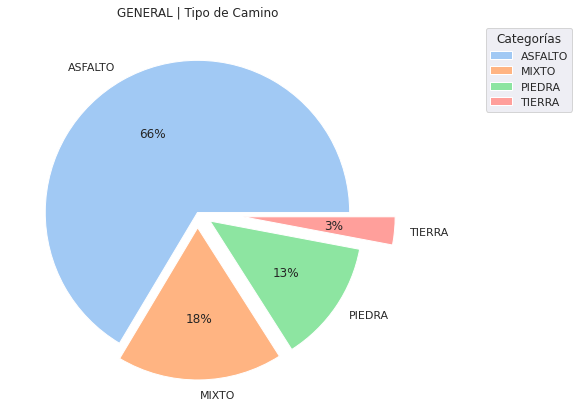

In [39]:
fig9 = df['tipo_camino'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Tipo de Camino',
    explode = [0,.1,.1,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    fig9,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()

## tiempo_reparaciones
    - A los encuestados se les pidio que indiquen el "tiempo" que demoran las "reparaciones viales".

In [40]:
df['tiempo_reparaciones'].isna().sum()

2

In [41]:
tiempo_rep = df['tiempo_reparaciones'].value_counts()

In [42]:
tiempo_rep

NO SE REPARAN    204
MUCHO            181
POCO              52
Name: tiempo_reparaciones, dtype: int64

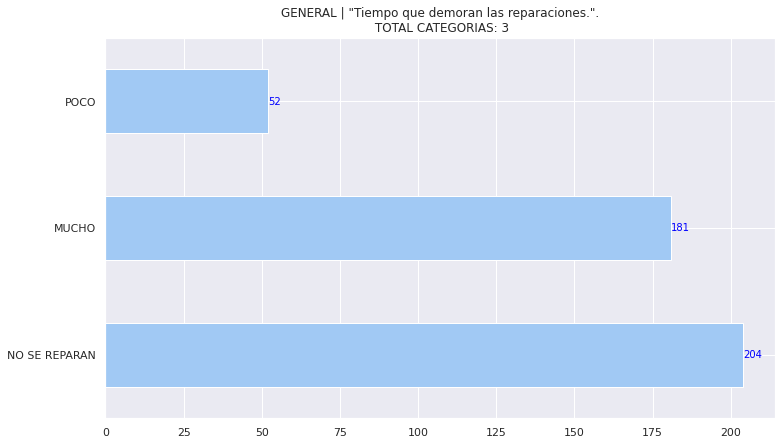

In [43]:
fig10 = tiempo_rep.plot(
    kind='barh',
    title=f'GENERAL | "Tiempo que demoran las reparaciones.".\n TOTAL CATEGORIAS: {tiempo_rep.size}',
)

for k,v in enumerate(tiempo_rep):
    fig10.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

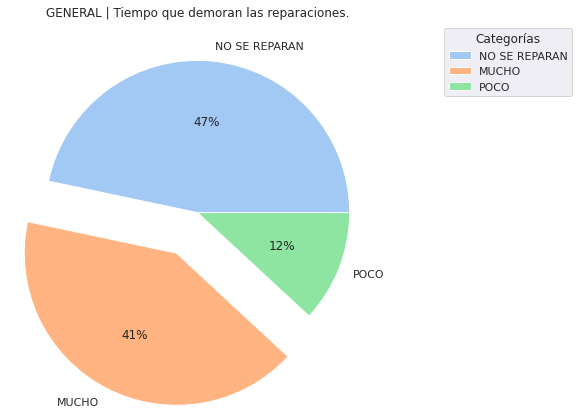

In [44]:
fig11 = df['tiempo_reparaciones'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Tiempo que demoran las reparaciones.',
    explode = [0,.3,0],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    fig11,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()

## como_denunciar
    - Se les pregunto a los encuestados si conocian algun metodo que les permita "denunciar" la existencia de baches en su lugar de residencia actual.

In [45]:
df['como_denunciar'].isna().sum()

3

In [46]:
como_de = df['como_denunciar'].value_counts()

In [47]:
como_de

NO    321
SI    115
Name: como_denunciar, dtype: int64

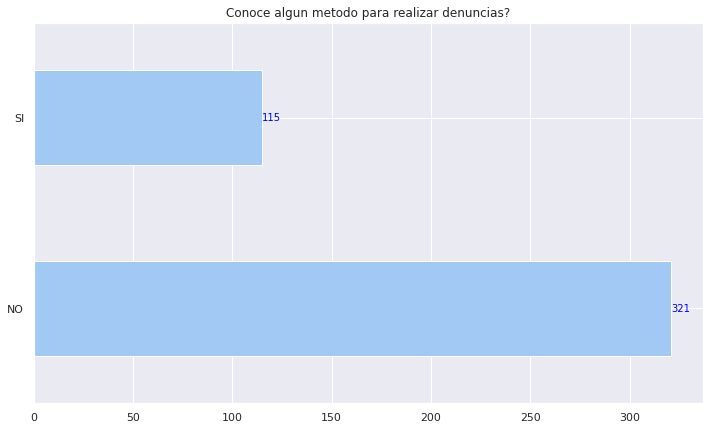

In [48]:
como_denunciar_plot = como_de.plot(
    title=f'Conoce algun metodo para realizar denuncias?',
    kind='barh')

for k,v in enumerate(como_de):
    como_denunciar_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

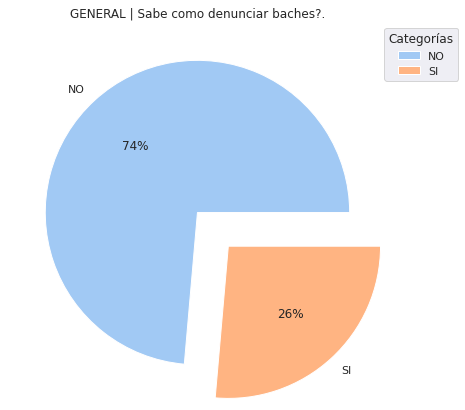

In [49]:
fig12 = df['como_denunciar'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Sabe como denunciar baches?.',
    explode = [0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    fig12,
    "upper right", 
    bbox_to_anchor=(1.2, 1), title='Categorías')


plt.show()

## acceso_informacion
    - A los encuestados se les pregunto si conocian o podian acceder a informacion relevante a baches, tal como la ubicacion, tereas de reparacion, etc.

In [50]:
acc_info = df['acceso_informacion'].value_counts()

In [51]:
acc_info

NO       230
NO SE    159
SI        49
Name: acceso_informacion, dtype: int64

In [52]:
df['acceso_informacion'].isna().sum()

1

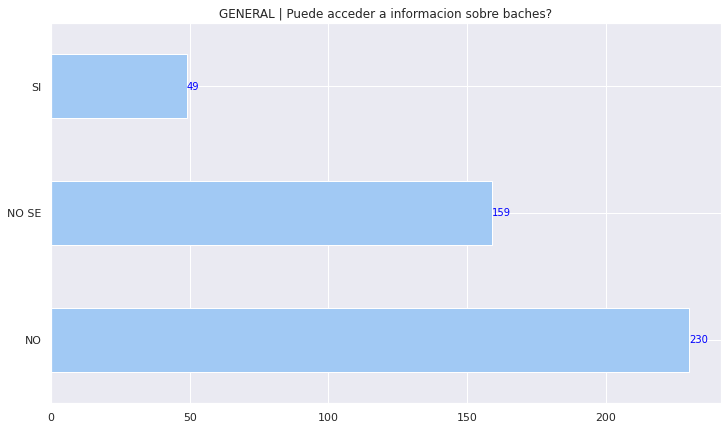

In [53]:
acc_info_plot = acc_info.plot(
    kind='barh',
    title='GENERAL | Puede acceder a informacion sobre baches?',
)
for k,v in enumerate(acc_info):
    acc_info_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

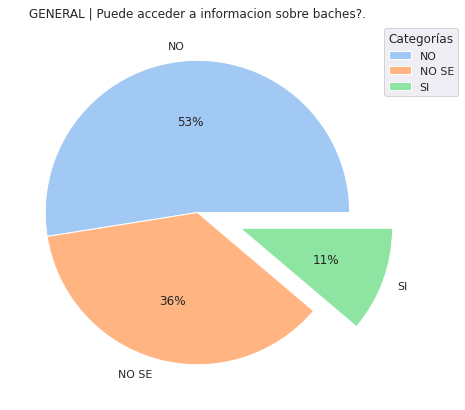

In [54]:
acc_info_pie = df['acceso_informacion'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Puede acceder a informacion sobre baches?.',
    explode = [0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    acc_info_pie,
    "upper right", 
    bbox_to_anchor=(1.2, 1), title='Categorías')


plt.show()

## sufrio_accidentes
    - Se les pregunto a los encuestados si alguna vez sufrieron accidentes a causa de "baches" o el estado de las calles en su lugar de residencia actual.

In [55]:
suf_acc = df['sufrio_accidentes'].value_counts()

In [56]:
suf_acc

NO                   208
SI                   150
NO NUNCA              57
SI FRECUENTEMENTE     23
Name: sufrio_accidentes, dtype: int64

In [57]:
df['sufrio_accidentes'].isna().sum()

1

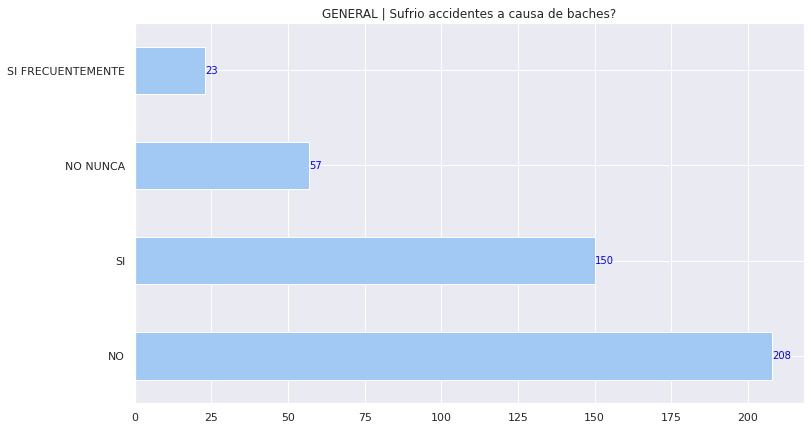

In [58]:
suf_acc_plot = suf_acc.plot(
    kind='barh',
    title='GENERAL | Sufrio accidentes a causa de baches?',
)
for k,v in enumerate(suf_acc):
    suf_acc_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

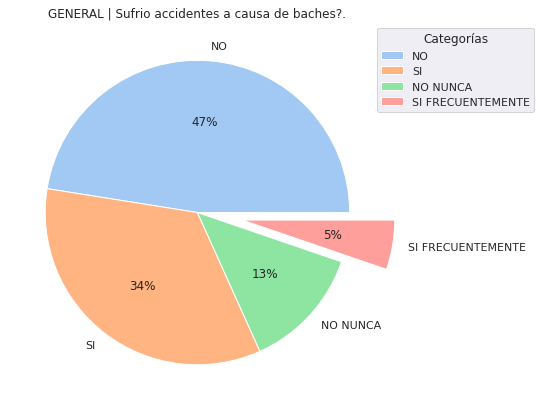

In [59]:
suf_acc_pie = df['sufrio_accidentes'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Sufrio accidentes a causa de baches?.',
    explode = [0,0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    suf_acc_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

## frecuencia_mantenimiento
    - Se les pregunto a los encuestados sobre la frecuencia en que hacen "mantenimiento" a sus vehiculos en caso de tenerlos.

In [60]:
frec_mant = df['frecuencia_mantenimiento'].value_counts()

In [61]:
df['frecuencia_mantenimiento'].isna().sum()

53

In [62]:
frec_mant

REGULARMENTE      228
FRECUENTEMENTE    158
Name: frecuencia_mantenimiento, dtype: int64

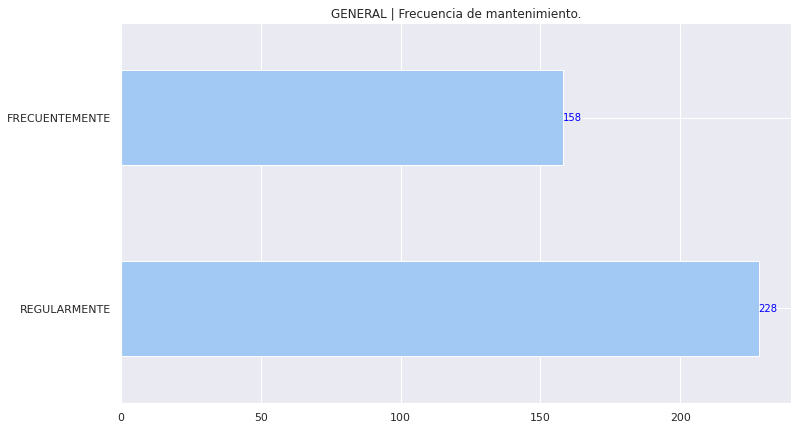

In [63]:
frec_mant_plot = frec_mant.plot(
    kind='barh',
    title='GENERAL | Frecuencia de mantenimiento.',
)
for k,v in enumerate(frec_mant):
    frec_mant_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

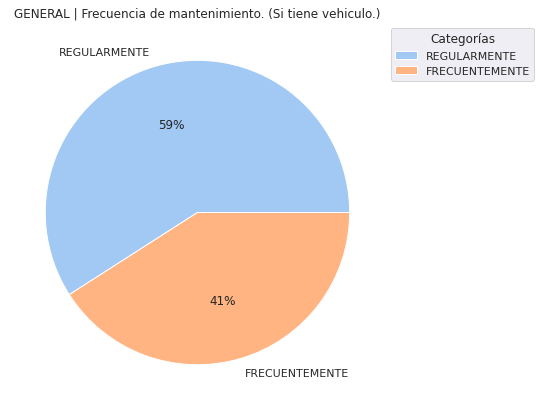

In [64]:
frec_mant_pie = df['frecuencia_mantenimiento'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Frecuencia de mantenimiento. (Si tiene vehiculo.)',
    #explode = [0,0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    frec_mant_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

## denunciaria_baches
    - Se les pregunto tambien a los encuestados si, en caso de poder, denunciarian la existencia de bacehs.

In [65]:
den_baches = df['denunciaria_baches'].value_counts()

In [66]:
df['denunciaria_baches'].isna().sum()

4

In [67]:
den_baches

SI                              284
SI NO ME LLEVA MUCHO TIEMPO.    119
NO                               32
Name: denunciaria_baches, dtype: int64

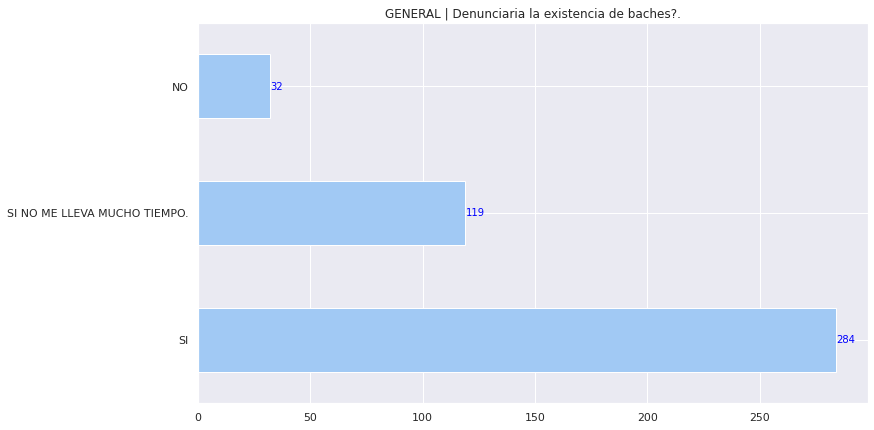

In [68]:
den_baches_plot = den_baches.plot(
    kind='barh',
    title='GENERAL | Denunciaria la existencia de baches?.',
)
for k,v in enumerate(den_baches):
    den_baches_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

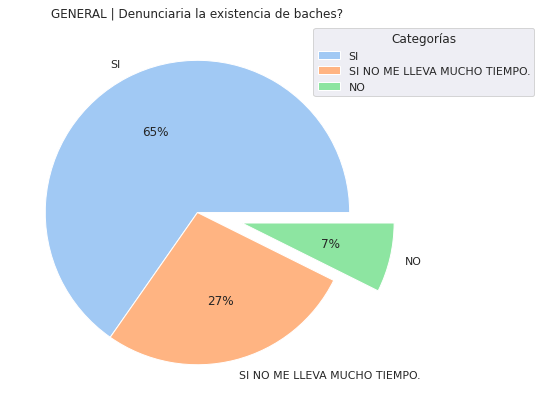

In [69]:
den_baches_pie = df['denunciaria_baches'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Denunciaria la existencia de baches?',
    explode = [0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    den_baches_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

## util_conocer
    - Se les consulto a los encuestados si concideran que seria util conocer datos sobre baches en su lugar de residencia.

In [70]:
util_cono = df['util_conocer'].value_counts()

In [71]:
df['util_conocer'].isna().sum()

3

In [72]:
util_cono

SI                        365
NO SE                      34
NO ME INTERESA EL TEMA     19
NO                         18
Name: util_conocer, dtype: int64

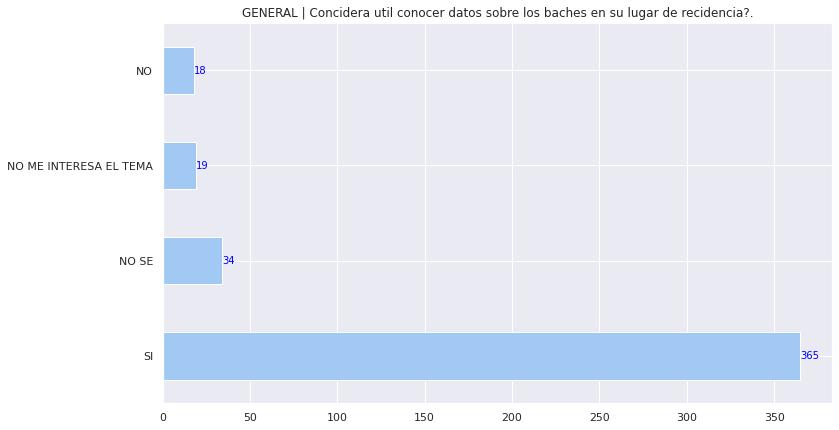

In [73]:
util_cono_plot = util_cono.plot(
    kind='barh',
    title='GENERAL | Concidera util conocer datos sobre los baches en su lugar de recidencia?.',
)
for k,v in enumerate(util_cono):
    util_cono_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

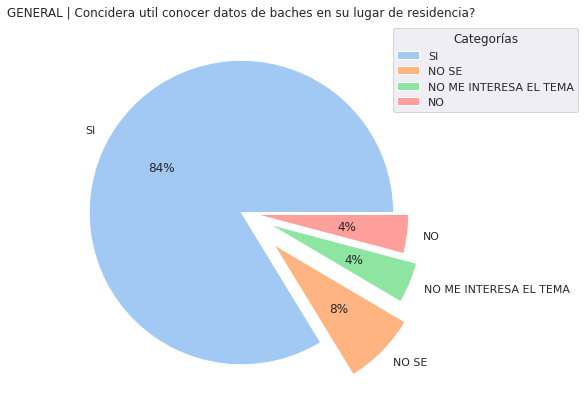

In [74]:
util_con_pie = df['util_conocer'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Concidera util conocer datos de baches en su lugar de residencia?',
    explode = [0,.3,.2,.1],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    util_con_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

## respuesta_gubernamental
    - A los encuestados se les pidio que estimen la "respuesta gubernamental" de acuerdo a lo que ellos piensan.

In [75]:
resp_gub = df['respuesta_gubernamental'].value_counts()

In [76]:
# Ver cuantos encuestados no respondieron la encuesta.
df['respuesta_gubernamental'].isna().sum()

10

In [77]:
resp_gub

LAMENTABLE    370
BUENA          48
EXCELENTE      11
Name: respuesta_gubernamental, dtype: int64

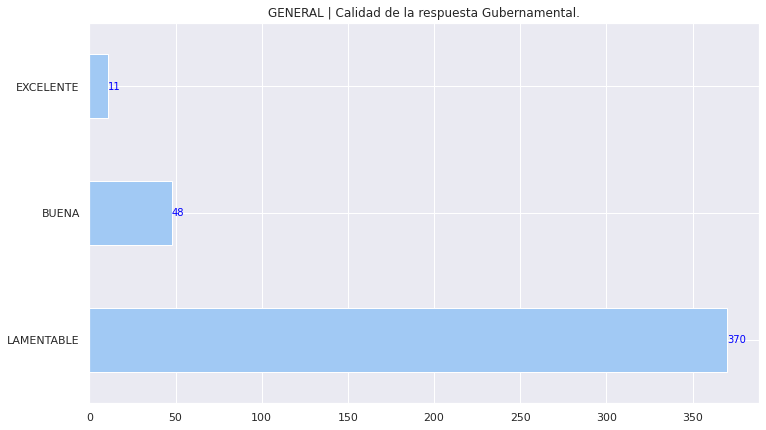

In [78]:
resp_gub_plot = resp_gub.plot(
    kind='barh',
    title='GENERAL | Calidad de la respuesta Gubernamental.',
)
for k,v in enumerate(resp_gub):
    resp_gub_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

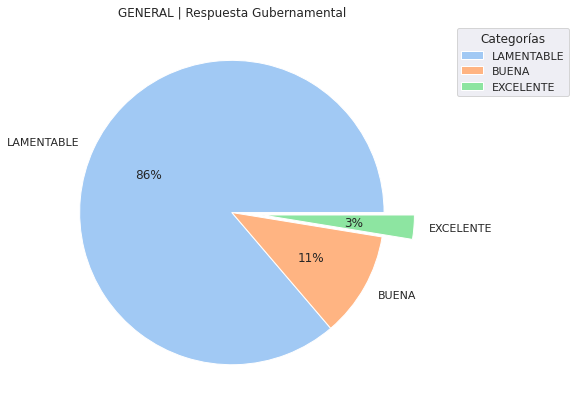

In [79]:
resp_gub_pie = df['respuesta_gubernamental'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Respuesta Gubernamental',
    explode = [0,0,.2],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    resp_gub_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

## regularidad_reparaciones
    - A los encuestados se les pidio que hagan una estimacion sobre la regularidad con la que se hacen reparaciones viales en su lugar de residencia.

In [80]:
# Verificar la cantidad de respuestas.
df['regularidad_reparaciones'].isna().sum()

5

In [81]:
reg_rep = df['regularidad_reparaciones'].value_counts()

In [82]:
reg_rep

NUNCA           287
REGULARMENTE    147
Name: regularidad_reparaciones, dtype: int64

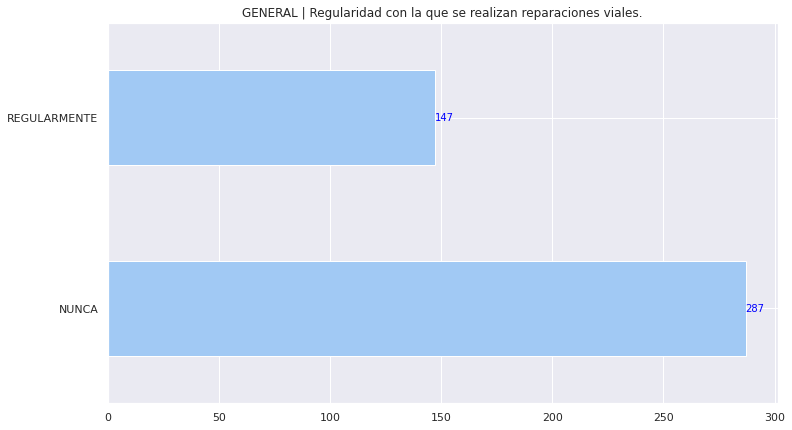

In [83]:
reg_repar_plot = reg_rep.plot(
    kind='barh',
    title='GENERAL | Regularidad con la que se realizan reparaciones viales.',
)
for k,v in enumerate(reg_rep):
    reg_repar_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

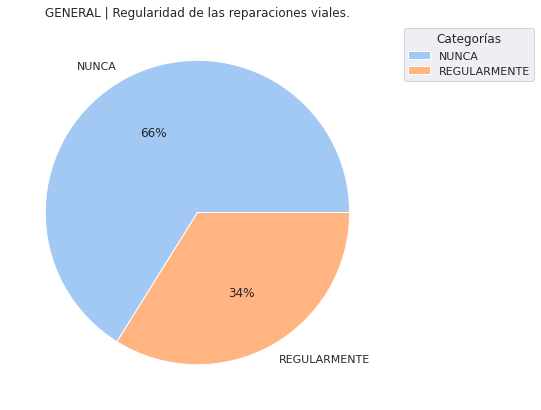

In [84]:
reg_rep_pie = df['regularidad_reparaciones'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Regularidad de las reparaciones viales.',
    #explode = [0,0,.2],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    reg_rep_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

# Correlacion Generalizada PAISES / PREGUNTAS
    - Analisis generalizado de preguntas realizadas en comparacion por paises a nivel general en la encuesta. Solo se tendran en cuenta los paises con mas de 10 encuestados.

In [85]:
grupo_paises = df.groupby('lugar_residencia')

In [86]:
paises = df['lugar_residencia'].value_counts()

In [87]:
# Reseting figure size params.
plt.rcParams['figure.figsize'] = [12, 15]

In [88]:
paises_mayor_diez = paises[paises>10]

In [89]:
paises_mayor_diez.keys()

Index(['Paraguay', 'Mexico', 'Argentina', 'Spain', 'Dominican Republic',
       'Peru', 'Venezuela', 'Colombia', 'Bolivia'],
      dtype='object')

# estado_calles


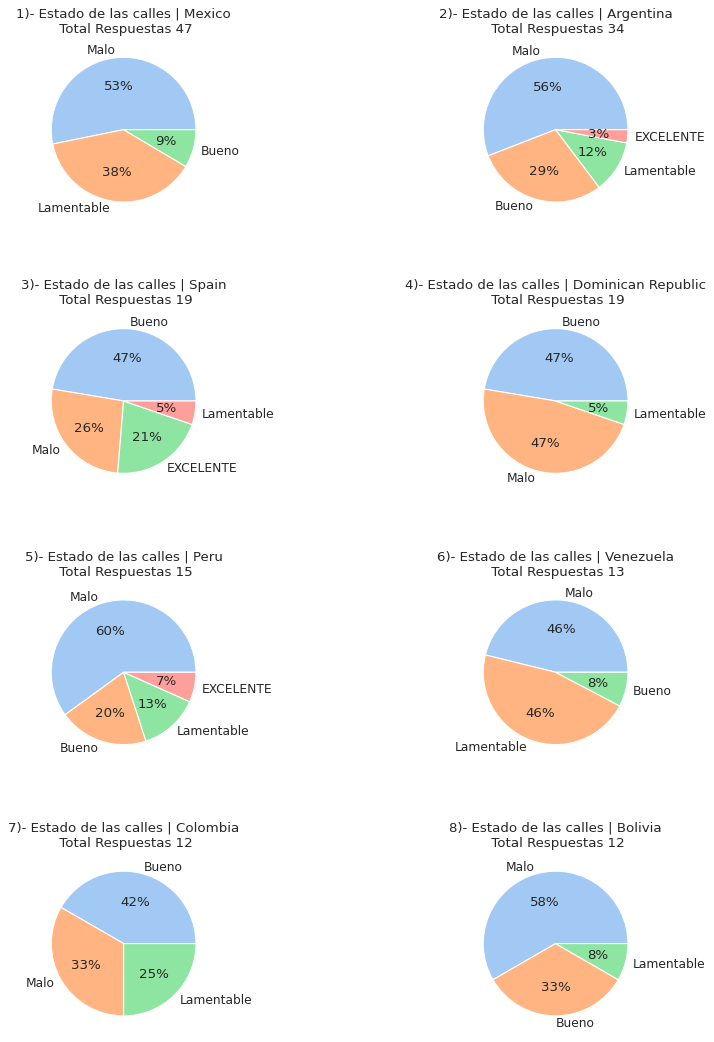

In [90]:
plt.figure(figsize=(15, 20), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        estado_plot = plt.subplot(8,2,k)
        p = grupo_paises.get_group(v)['estado_calles']
        p.value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Estado de las calles | {v}\n Total Respuestas {p.notna().sum()}',
        ylabel='',
        autopct='%.0f%%',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['estado_calles'].value_counts().values):
           estado_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.7, 
                    top=1.4, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()

In [91]:
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        g = grupo_paises.get_group(v)['estado_calles'].value_counts(normalize=True)
        print('='*40)
        print(f'{v} | Respuestas: {p.notna().sum()}')
        print('='*40)
        print(g)
        print('\n'*2)

Mexico | Respuestas: 12
Malo          0.531915
Lamentable    0.382979
Bueno         0.085106
Name: estado_calles, dtype: float64



Argentina | Respuestas: 12
Malo          0.558824
Bueno         0.294118
Lamentable    0.117647
EXCELENTE     0.029412
Name: estado_calles, dtype: float64



Spain | Respuestas: 12
Bueno         0.473684
Malo          0.263158
EXCELENTE     0.210526
Lamentable    0.052632
Name: estado_calles, dtype: float64



Dominican Republic | Respuestas: 12
Bueno         0.473684
Malo          0.473684
Lamentable    0.052632
Name: estado_calles, dtype: float64



Peru | Respuestas: 12
Malo          0.600000
Bueno         0.200000
Lamentable    0.133333
EXCELENTE     0.066667
Name: estado_calles, dtype: float64



Venezuela | Respuestas: 12
Malo          0.461538
Lamentable    0.461538
Bueno         0.076923
Name: estado_calles, dtype: float64



Colombia | Respuestas: 12
Bueno         0.416667
Malo          0.333333
Lamentable    0.250000
Name: estado_calles, dtype: f

# problema_baches


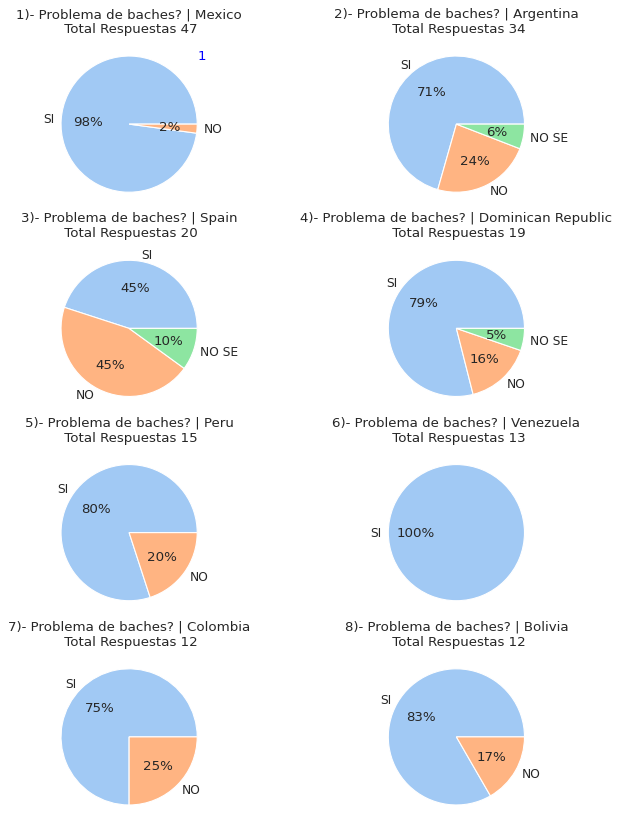

In [92]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        problema_baches_plot = plt.subplot(8,2,k)
        p = grupo_paises.get_group(v)['problema_baches']
        p.value_counts().plot(
        kind='pie',
        title=f'{k})- Problema de baches? | {v}\n Total Respuestas {p.notna().sum()}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['problema_baches'].value_counts().values):
           problema_baches_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

In [93]:
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        g = grupo_paises.get_group(v)['problema_baches'].value_counts(normalize=True)
        print('='*40)
        print(f'{v} | Respuestas: {p.notna().sum()}')
        print('='*40)
        print(g)
        print('\n'*2)

Mexico | Respuestas: 12
SI    0.978723
NO    0.021277
Name: problema_baches, dtype: float64



Argentina | Respuestas: 12
SI       0.705882
NO       0.235294
NO SE    0.058824
Name: problema_baches, dtype: float64



Spain | Respuestas: 12
SI       0.45
NO       0.45
NO SE    0.10
Name: problema_baches, dtype: float64



Dominican Republic | Respuestas: 12
SI       0.789474
NO       0.157895
NO SE    0.052632
Name: problema_baches, dtype: float64



Peru | Respuestas: 12
SI    0.8
NO    0.2
Name: problema_baches, dtype: float64



Venezuela | Respuestas: 12
SI    1.0
Name: problema_baches, dtype: float64



Colombia | Respuestas: 12
SI    0.75
NO    0.25
Name: problema_baches, dtype: float64



Bolivia | Respuestas: 12
SI    0.833333
NO    0.166667
Name: problema_baches, dtype: float64





# estimacion_cantidad


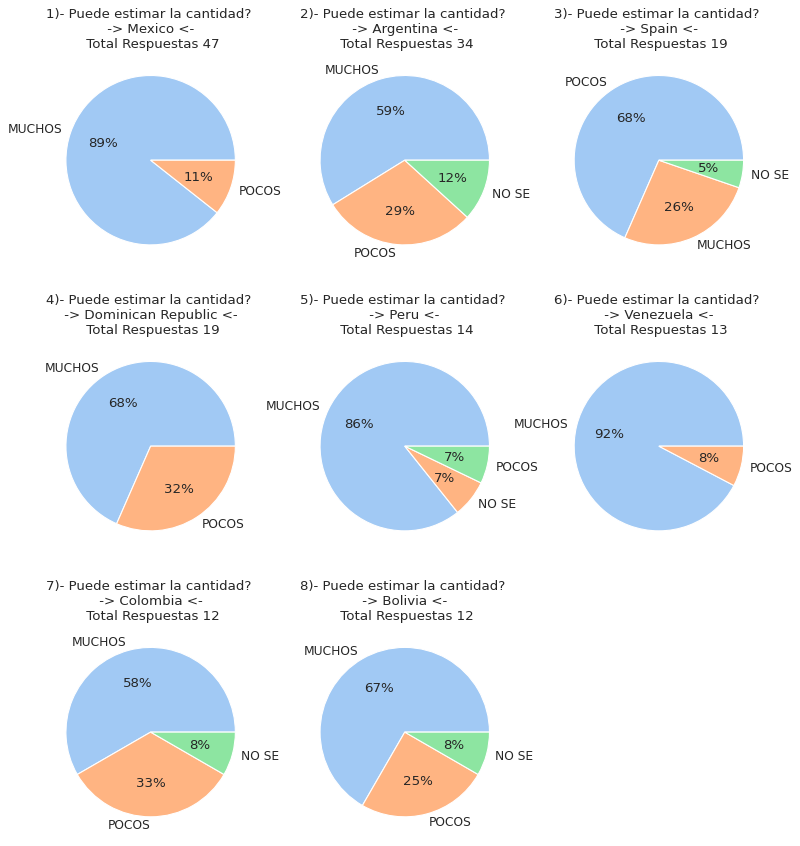

In [94]:
plt.figure(figsize=(30, 40), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        problema_baches_plot = plt.subplot(8,3,k)
        p = grupo_paises.get_group(v)['estimacion_cantidad']
        p.value_counts().plot(
        kind='pie',
        title=f'{k})- Puede estimar la cantidad? \n -> {v} <- \n Total Respuestas {p.notna().sum()}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
      #  for k,v in enumerate( grupo_paises.get_group(v)['estimacion_cantidad'].value_counts().values):
       #    problema_baches_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.4, 
                    top=.8, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

In [95]:
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        g = grupo_paises.get_group(v)['estimacion_cantidad'].value_counts(normalize=True)
        print('='*40)
        print(f'{k}) - {v} | Respuestas: {p.notna().sum()}')
        print('_'*20)
        print('[CATEGORIA | PORCENTAJE]')
        print('='*40)
        print(g)
        print('\n'*2)

1) - Mexico | Respuestas: 12
____________________
[CATEGORIA | PORCENTAJE]
MUCHOS    0.893617
POCOS     0.106383
Name: estimacion_cantidad, dtype: float64



2) - Argentina | Respuestas: 12
____________________
[CATEGORIA | PORCENTAJE]
MUCHOS    0.588235
POCOS     0.294118
NO SE     0.117647
Name: estimacion_cantidad, dtype: float64



3) - Spain | Respuestas: 12
____________________
[CATEGORIA | PORCENTAJE]
POCOS     0.684211
MUCHOS    0.263158
NO SE     0.052632
Name: estimacion_cantidad, dtype: float64



4) - Dominican Republic | Respuestas: 12
____________________
[CATEGORIA | PORCENTAJE]
MUCHOS    0.684211
POCOS     0.315789
Name: estimacion_cantidad, dtype: float64



5) - Peru | Respuestas: 12
____________________
[CATEGORIA | PORCENTAJE]
MUCHOS    0.857143
NO SE     0.071429
POCOS     0.071429
Name: estimacion_cantidad, dtype: float64



6) - Venezuela | Respuestas: 12
____________________
[CATEGORIA | PORCENTAJE]
MUCHOS    0.923077
POCOS     0.076923
Name: estimacion_cantidad

# tipo_camino


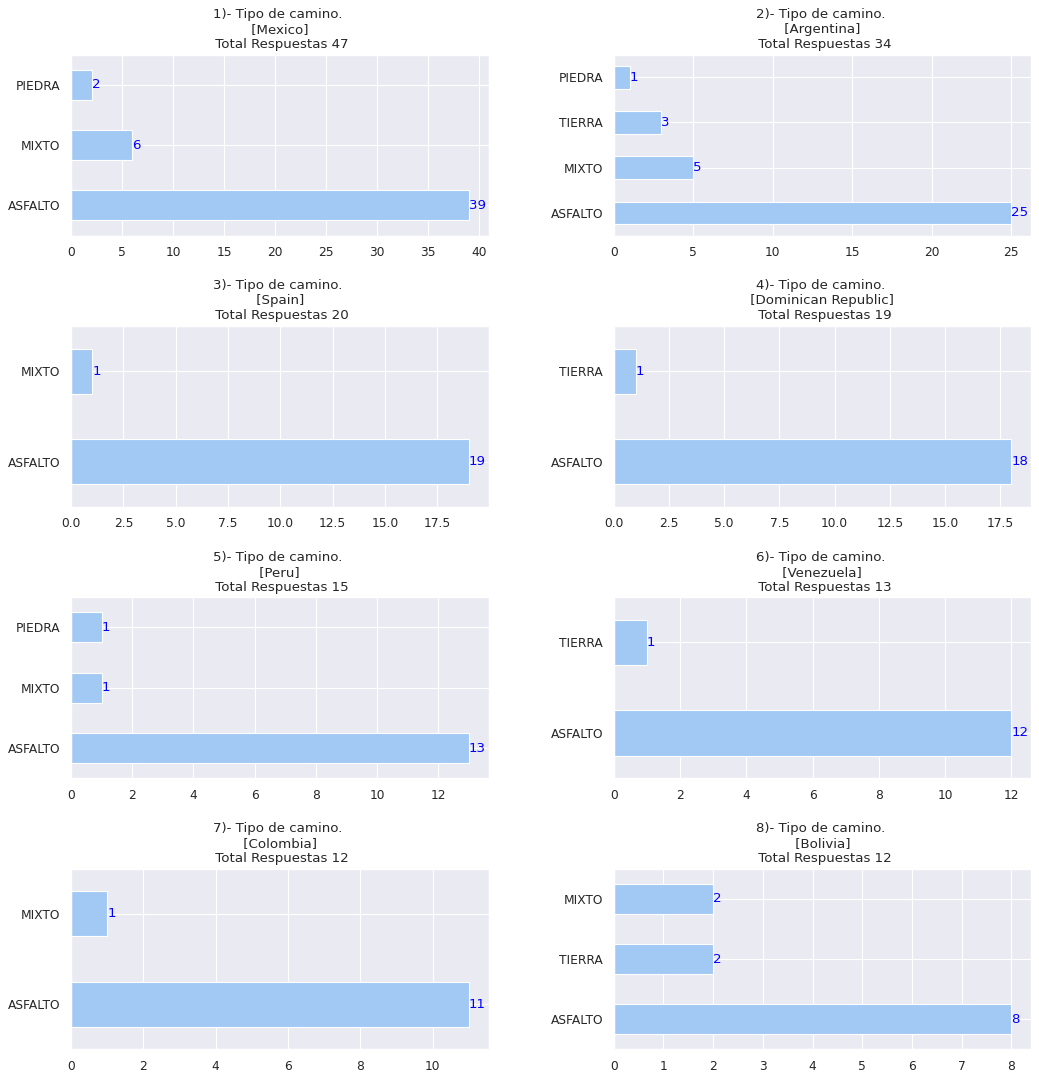

In [96]:
plt.figure(figsize=(15, 20), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        tipo_camino_plot = plt.subplot(8,2,k)
        p = grupo_paises.get_group(v)['tipo_camino']
        p.value_counts().plot(
        kind='barh',
        title=f'{k})- Tipo de camino. \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['tipo_camino'].value_counts().values):
           tipo_camino_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.5)

plt.show()

# tiempo_reparaciones


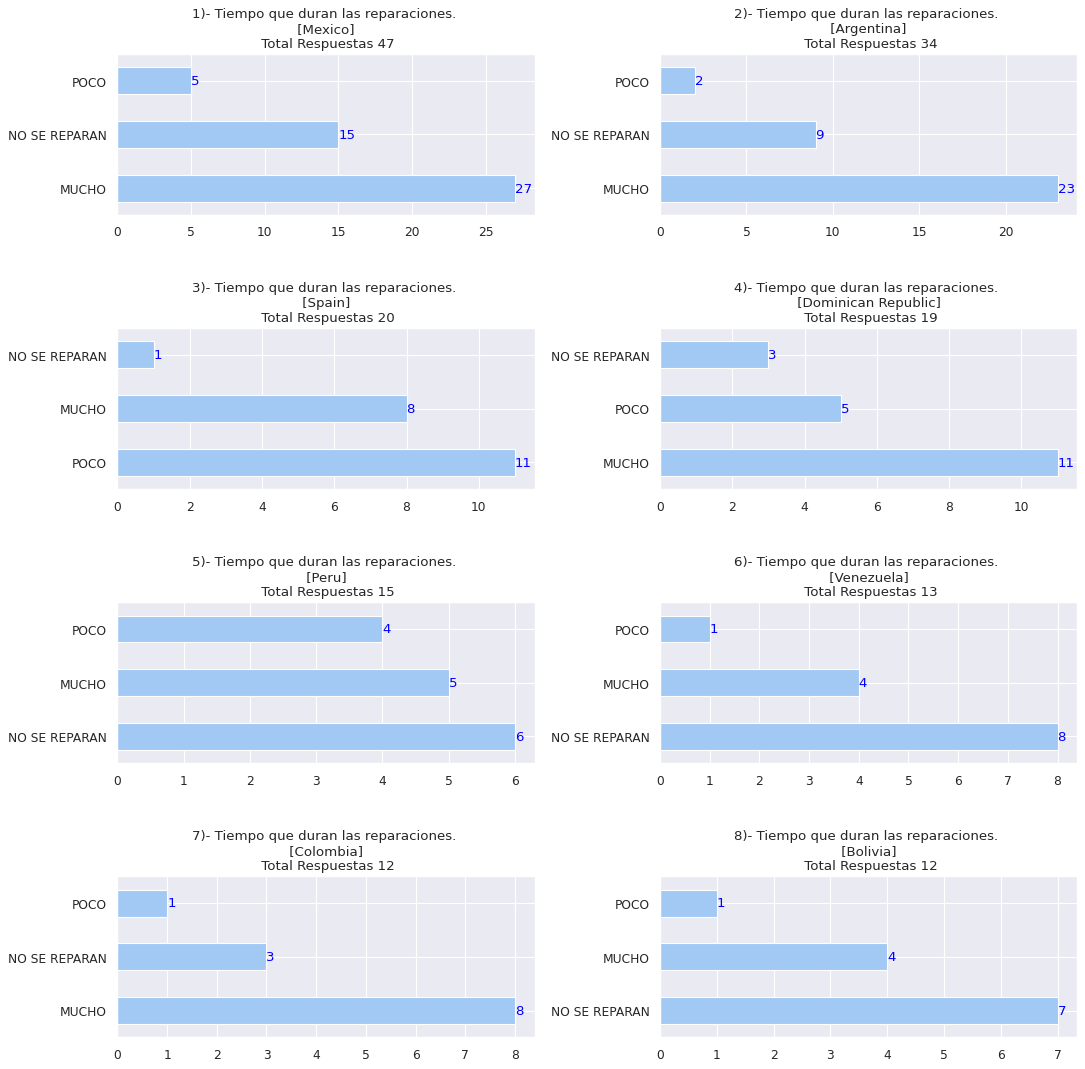

In [97]:
plt.figure(figsize=(15, 20), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        tiempo_reparaciones_plot = plt.subplot(8,2,k)
        p = grupo_paises.get_group(v)['tiempo_reparaciones']
        p.value_counts().plot(
        kind='barh',
        title=f'{k})- Tiempo que duran las reparaciones. \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['tiempo_reparaciones'].value_counts().values):
           tiempo_reparaciones_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

# como_denunciar


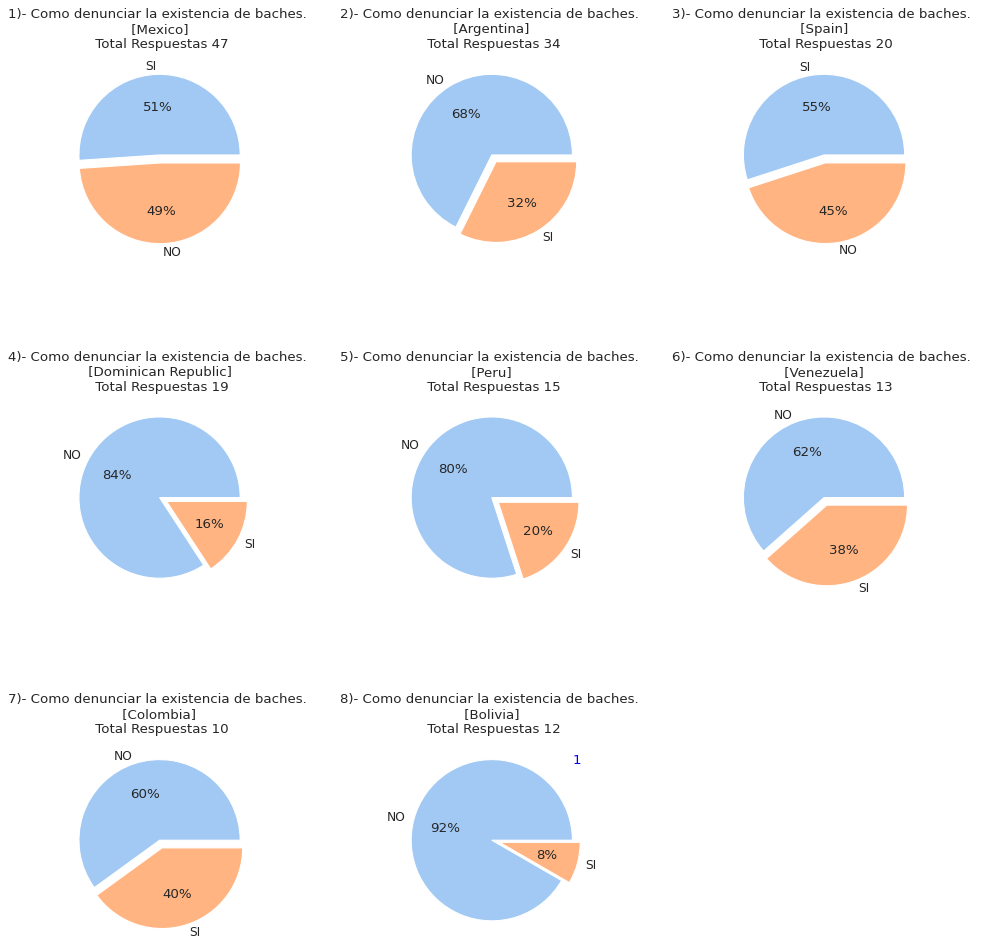

In [98]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        como_denunciar_plot = plt.subplot(8,3,k)
        p = grupo_paises.get_group(v)['como_denunciar']
        p.value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Como denunciar la existencia de baches. \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        autopct='%.0f%%',
        explode=[0,.1],
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['como_denunciar'].value_counts().values):
           como_denunciar_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

# acceso_informacion


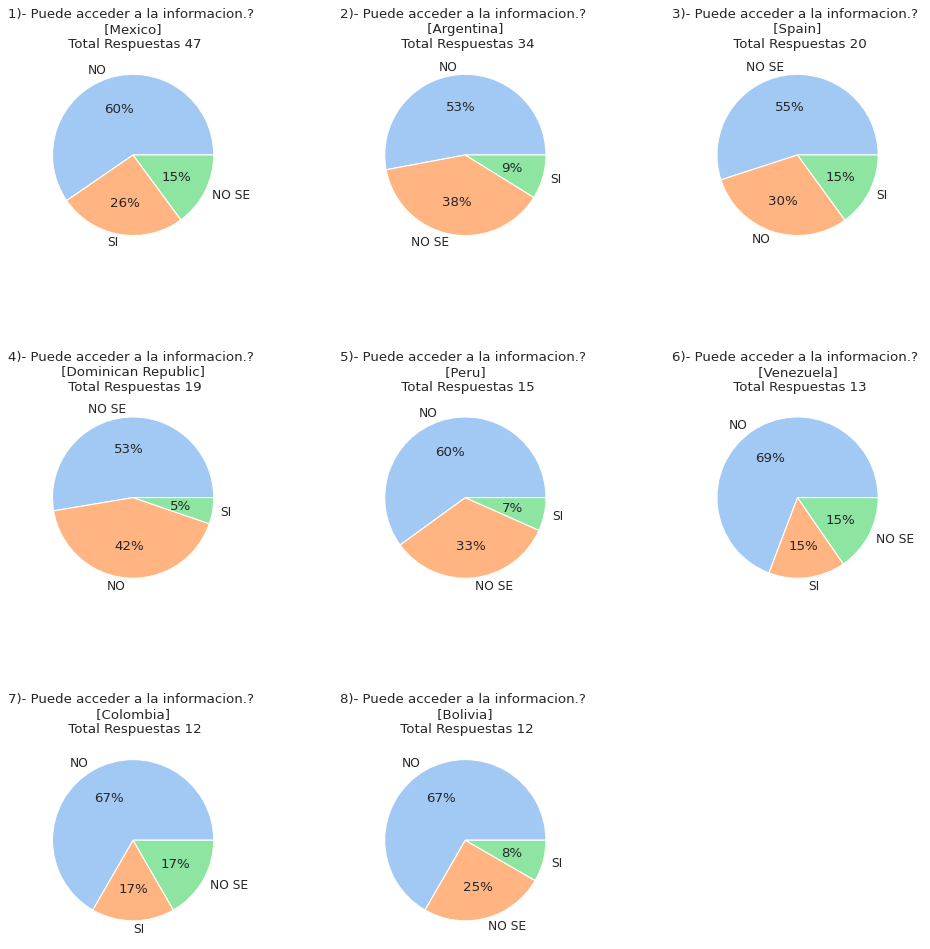

In [99]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        acceder_info_plot = plt.subplot(8,3,k)
        p = grupo_paises.get_group(v)['acceso_informacion']
        p.value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Puede acceder a la informacion.? \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        autopct='%.0f%%',
        #explode=[0,.1],
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['acceso_informacion'].value_counts().values):
           acceder_info_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

# sufrio_accidentes


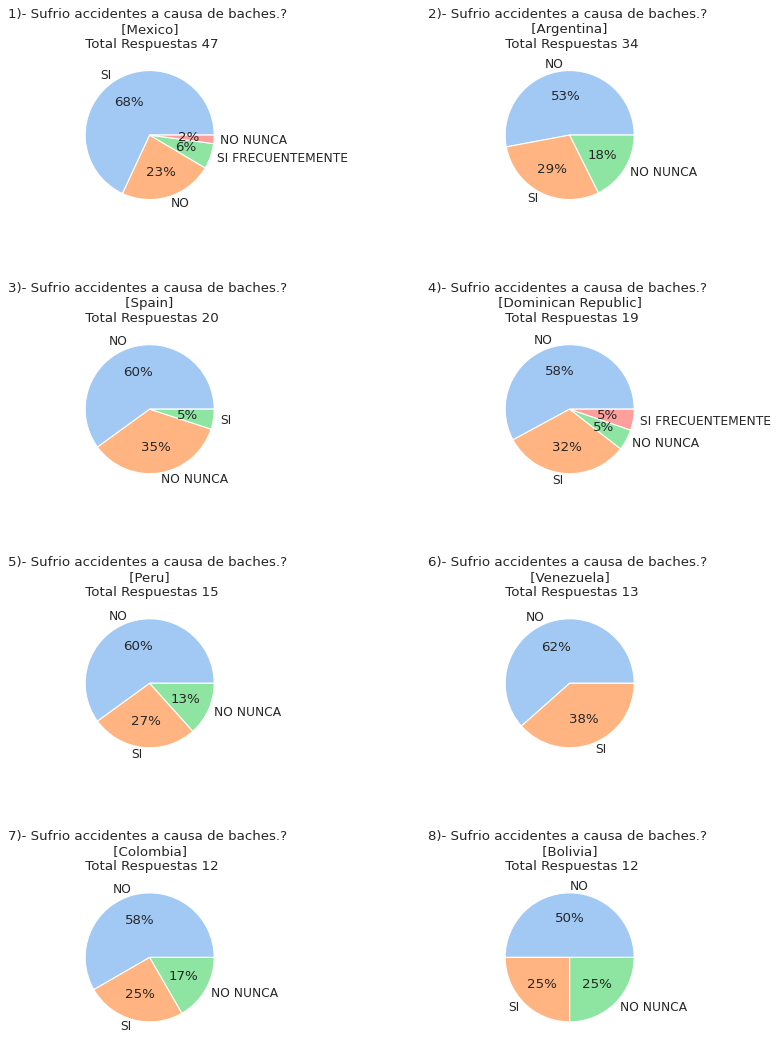

In [100]:
plt.figure(figsize=(15, 20), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        sufrio_acc_plot = plt.subplot(8,2,k)
        p = grupo_paises.get_group(v)['sufrio_accidentes']
        p.value_counts(normalize=True).plot(
        kind='pie',
        autopct='%.0f%%',
        title=f'{k})- Sufrio accidentes a causa de baches.? \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['sufrio_accidentes'].value_counts().values):
           sufrio_acc_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.7, 
                    top=1.4, 
                    wspace=0.4, 
                    hspace=0.7)

plt.show()

# frecuencia_mantenimiento


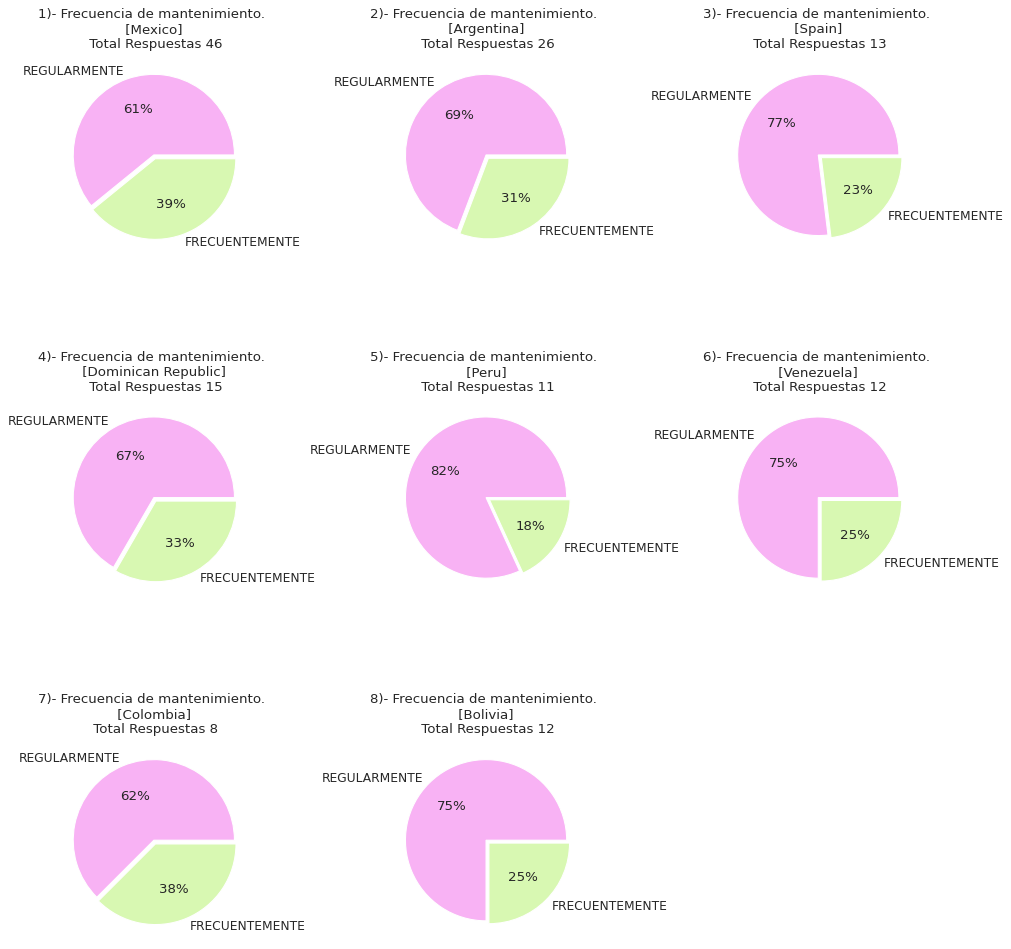

In [101]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        frec_mant_plot = plt.subplot(8,3,k)
        p = grupo_paises.get_group(v)['frecuencia_mantenimiento']
        p.value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Frecuencia de mantenimiento. \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        autopct='%.0f%%',
        colors = ['#F8B2F4','#D8F8B2'],
        explode=[0,.05],
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['frecuencia_mantenimiento'].value_counts().values):
           frec_mant_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

# denunciaria_baches


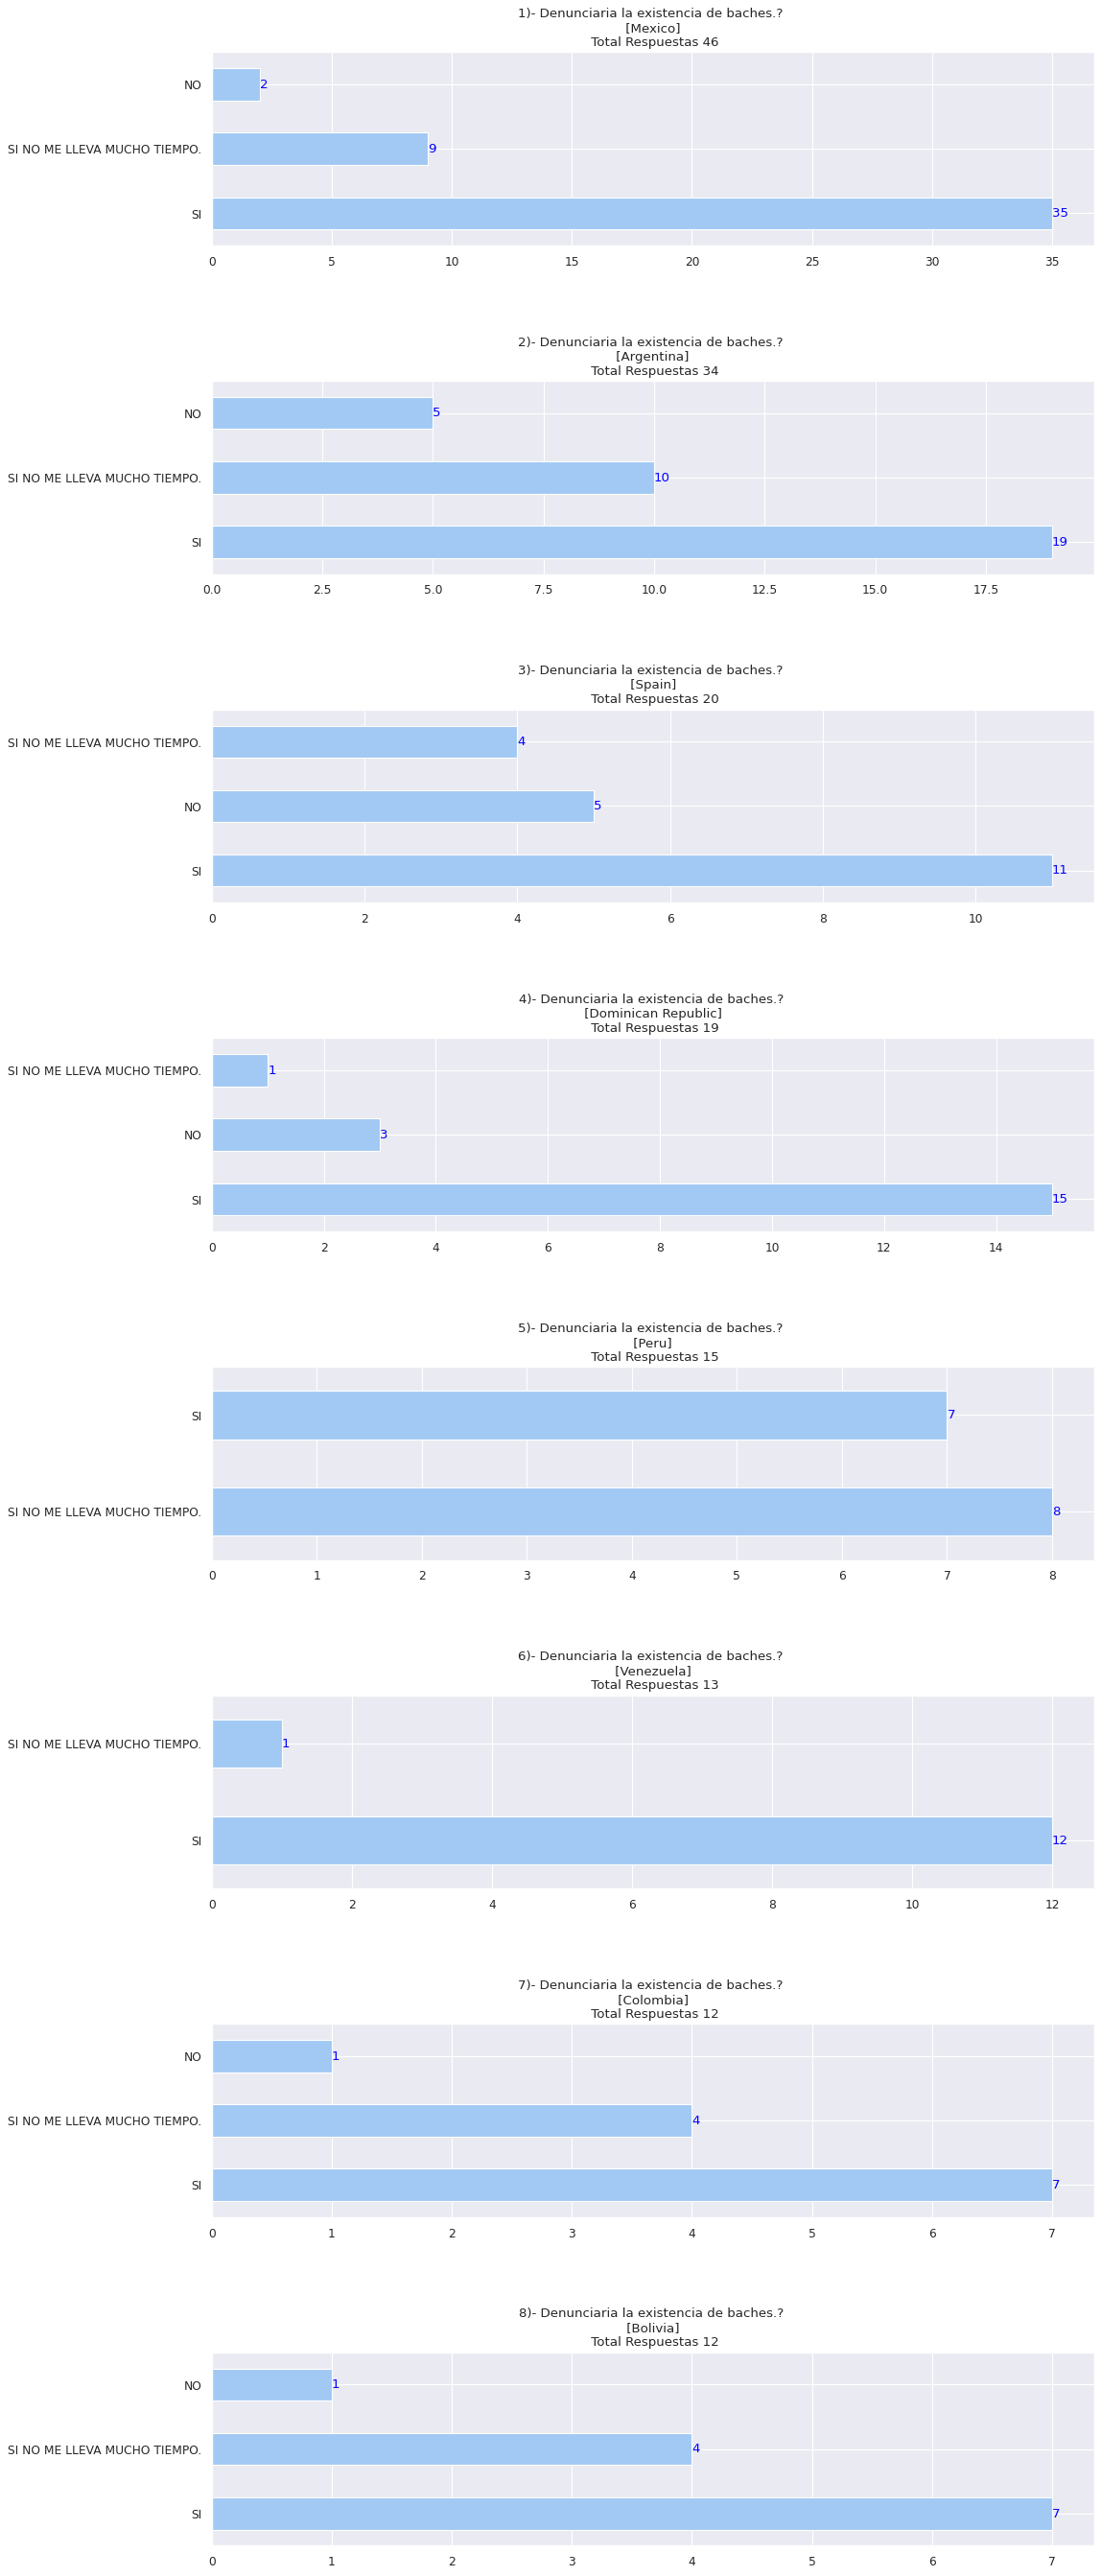

In [102]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        frec_mant_plot = plt.subplot(8,1,k)
        p = grupo_paises.get_group(v)['denunciaria_baches']
        p.value_counts().plot(
        kind='barh',
        title=f'{k})- Denunciaria la existencia de baches.? \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['denunciaria_baches'].value_counts().values):
           frec_mant_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

In [103]:
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        g = grupo_paises.get_group(v)['denunciaria_baches'].value_counts(normalize=True)
        print('='*40)
        print('\t Denunciaria baches?')
        print('_'*40)
        print(f'{k}) - {v} | Respuestas: {p.notna().sum()}')
        print('_'*40)
        print('[CATEGORIA | PORCENTAJE]')
        print('='*40)
        print(g)
        print('\n'*2)

	 Denunciaria baches?
________________________________________
1) - Mexico | Respuestas: 12
________________________________________
[CATEGORIA | PORCENTAJE]
SI                              0.760870
SI NO ME LLEVA MUCHO TIEMPO.    0.195652
NO                              0.043478
Name: denunciaria_baches, dtype: float64



	 Denunciaria baches?
________________________________________
2) - Argentina | Respuestas: 12
________________________________________
[CATEGORIA | PORCENTAJE]
SI                              0.558824
SI NO ME LLEVA MUCHO TIEMPO.    0.294118
NO                              0.147059
Name: denunciaria_baches, dtype: float64



	 Denunciaria baches?
________________________________________
3) - Spain | Respuestas: 12
________________________________________
[CATEGORIA | PORCENTAJE]
SI                              0.55
NO                              0.25
SI NO ME LLEVA MUCHO TIEMPO.    0.20
Name: denunciaria_baches, dtype: float64



	 Denunciaria baches?
_____________

# util_conocer


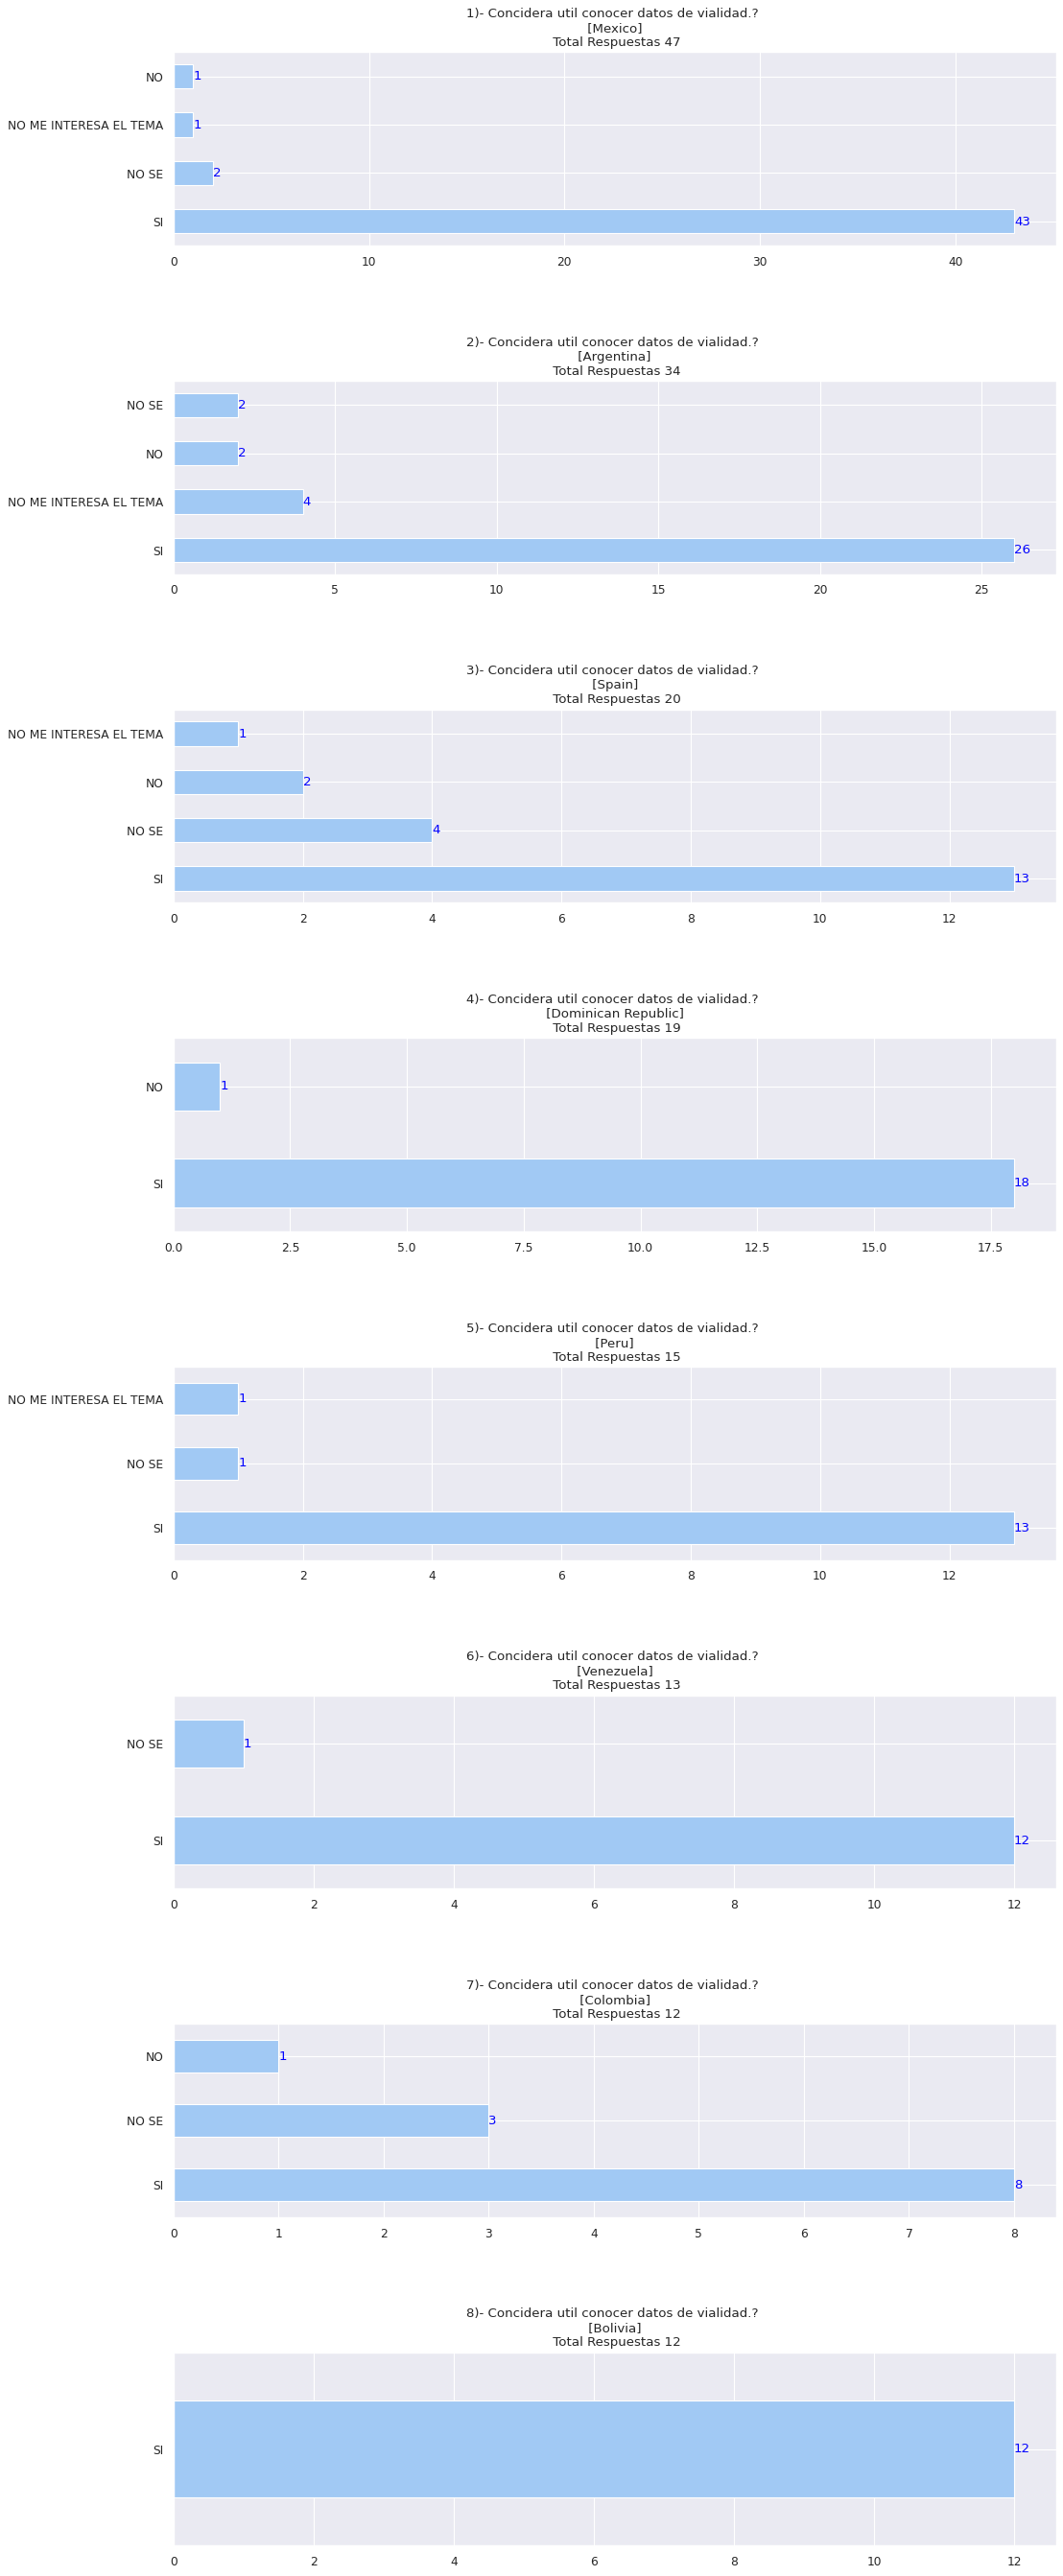

In [104]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        frec_mant_plot = plt.subplot(8,1,k)
        p = grupo_paises.get_group(v)['util_conocer']
        p.value_counts().plot(
        kind='barh',
        title=f'{k})- Concidera util conocer datos de vialidad.? \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['util_conocer'].value_counts().values):
           frec_mant_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

In [105]:
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        g = grupo_paises.get_group(v)['util_conocer'].value_counts(normalize=True)
        print('='*40)
        print('Es util concocer datos de baches?')
        print('_'*40)
        print(f'{k}) - {v} | Respuestas: {p.notna().sum()}')
        print('_'*40)
        print('[CATEGORIA | PORCENTAJE]')
        print('='*40)
        print(g)
        print('\n'*2)

Es util concocer datos de baches?
________________________________________
1) - Mexico | Respuestas: 12
________________________________________
[CATEGORIA | PORCENTAJE]
SI                        0.914894
NO SE                     0.042553
NO ME INTERESA EL TEMA    0.021277
NO                        0.021277
Name: util_conocer, dtype: float64



Es util concocer datos de baches?
________________________________________
2) - Argentina | Respuestas: 12
________________________________________
[CATEGORIA | PORCENTAJE]
SI                        0.764706
NO ME INTERESA EL TEMA    0.117647
NO                        0.058824
NO SE                     0.058824
Name: util_conocer, dtype: float64



Es util concocer datos de baches?
________________________________________
3) - Spain | Respuestas: 12
________________________________________
[CATEGORIA | PORCENTAJE]
SI                        0.65
NO SE                     0.20
NO                        0.10
NO ME INTERESA EL TEMA    0.05
Name: ut

# respuesta_gubernamental


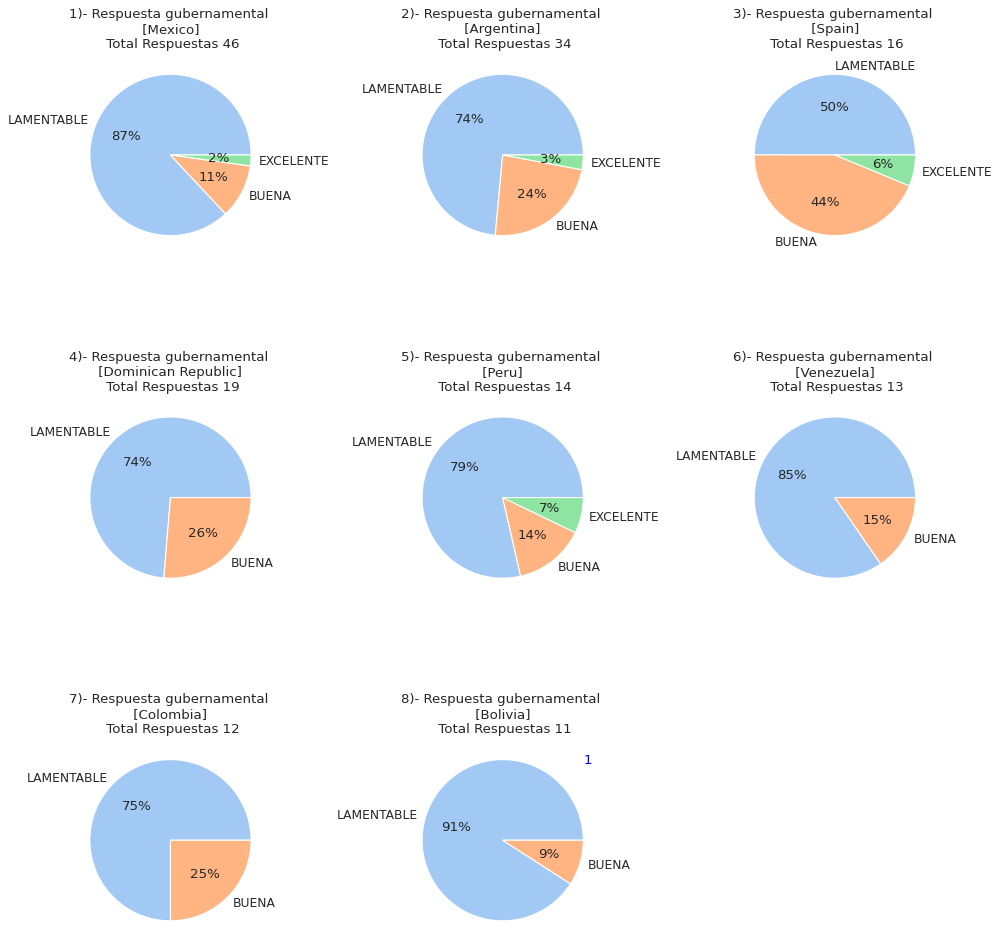

In [106]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        resp_gub_plot = plt.subplot(8,3,k)
        p = grupo_paises.get_group(v)['respuesta_gubernamental']
        p.value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Respuesta gubernamental \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        autopct='%.0f%%',
        #explode=[0,.03],
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['respuesta_gubernamental'].value_counts().values):
           resp_gub_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()

In [107]:
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        g = grupo_paises.get_group(v)['respuesta_gubernamental'].value_counts(normalize=True)
        print('='*40)
        print('Respuesta gubernamental')
        print('_'*40)
        print(f'{k}) - {v} | Respuestas: {p.notna().sum()}')
        print('_'*40)
        print('[CATEGORIA | PORCENTAJE]')
        print('='*40)
        print(g)
        print('\n'*2)

Respuesta gubernamental
________________________________________
1) - Mexico | Respuestas: 11
________________________________________
[CATEGORIA | PORCENTAJE]
LAMENTABLE    0.869565
BUENA         0.108696
EXCELENTE     0.021739
Name: respuesta_gubernamental, dtype: float64



Respuesta gubernamental
________________________________________
2) - Argentina | Respuestas: 11
________________________________________
[CATEGORIA | PORCENTAJE]
LAMENTABLE    0.735294
BUENA         0.235294
EXCELENTE     0.029412
Name: respuesta_gubernamental, dtype: float64



Respuesta gubernamental
________________________________________
3) - Spain | Respuestas: 11
________________________________________
[CATEGORIA | PORCENTAJE]
LAMENTABLE    0.5000
BUENA         0.4375
EXCELENTE     0.0625
Name: respuesta_gubernamental, dtype: float64



Respuesta gubernamental
________________________________________
4) - Dominican Republic | Respuestas: 11
________________________________________
[CATEGORIA | PORCENTAJE

# regularidad_reparaciones

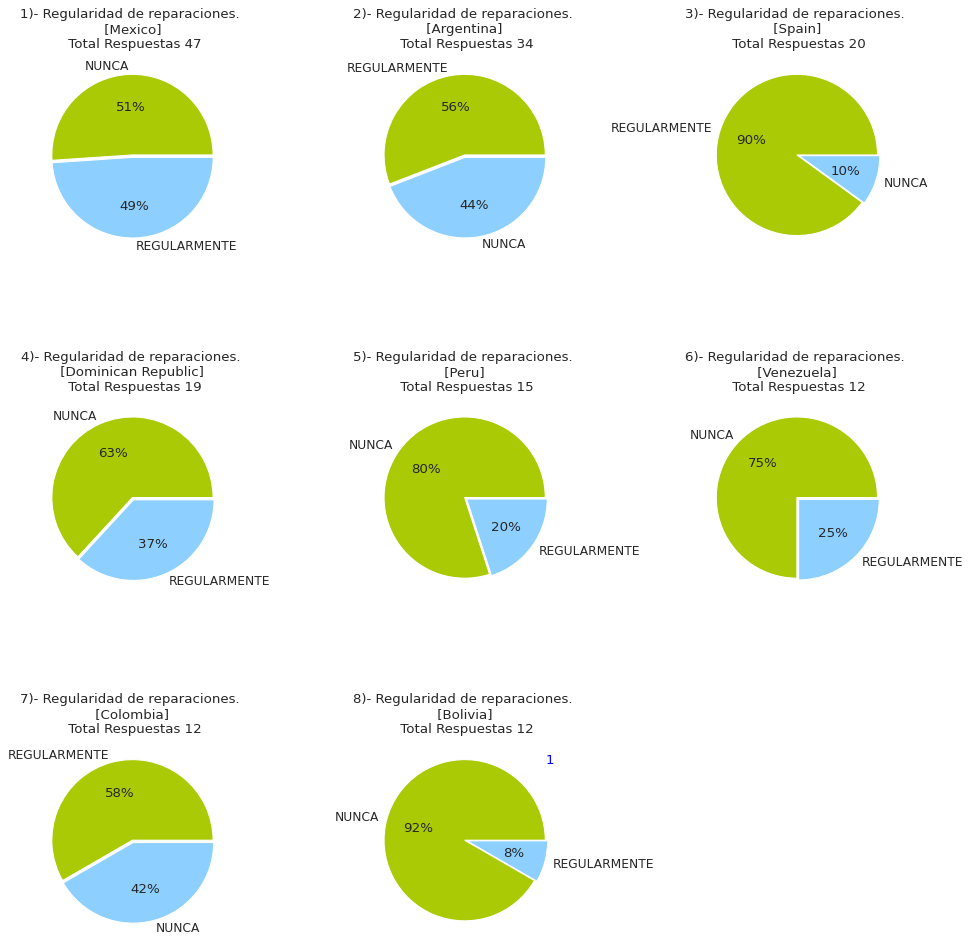

In [108]:
plt.figure(figsize=(23, 25), dpi=80) 
k=0
for k,v in enumerate(paises_mayor_diez.keys()):
    if(v!='Paraguay'):
        resp_gub_plot = plt.subplot(8,3,k)
        p = grupo_paises.get_group(v)['regularidad_reparaciones']
        p.value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Regularidad de reparaciones. \n [{v}] \n Total Respuestas {p.notna().sum()}',
        ylabel='',
        autopct='%.0f%%',
        colors = ['#A9CA05','#8DCFFE'],
        explode=[0,.03],
        xlabel=''
        )
        
        for k,v in enumerate( grupo_paises.get_group(v)['regularidad_reparaciones'].value_counts().values):
           resp_gub_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
        k+=1
    else:
        pass
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.4, 
                    wspace=0.3, 
                    hspace=0.7)

plt.show()